In [13]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [14]:
data = load_iris()
X = data.data
y = data.target

print(f"{type(X)} of shape {X.shape}")
print(f"{type(y)} of shape {y.shape}")
print(y)

<class 'numpy.ndarray'> of shape (150, 4)
<class 'numpy.ndarray'> of shape (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


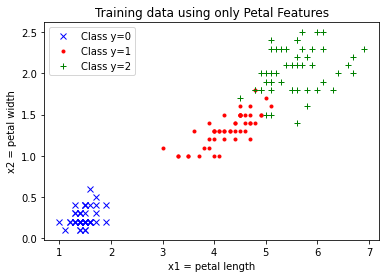

In [15]:
print(data.feature_names)

plt.plot(X[:50, 2], X[:50, 3], "bx", label="Class y=0") 
plt.plot(X[50:100, 2], X[50:100, 3], "r.", label="Class y=1")
plt.plot(X[100:, 2], X[100:, 3], "g+", label="Class y=2")
plt.xlabel("x1 = petal length")
plt.ylabel("x2 = petal width")
plt.title("Training data using only Petal Features")
plt.legend(loc="best")

## Logistic Regression

Logistic Regression requires a binary target. So we have to recode `y` into a binary variable. Currently, it can take up values 0, 1, and 3. 

In [16]:
print(y)
y = (y == 0).astype(int)
y

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

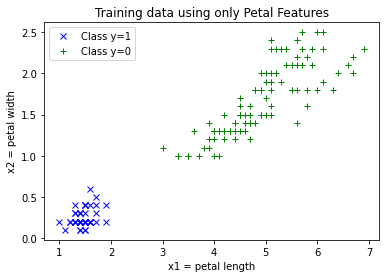

In [17]:
plt.plot(X[:50, 2], X[:50, 3], "bx", label="Class y=1") 
plt.plot(X[50:, 2], X[50:, 3], "g+", label="Class y=0")
plt.xlabel("x1 = petal length")
plt.ylabel("x2 = petal width")
plt.title("Training data using only Petal Features")
plt.legend(loc="best")

### Logistic Regression from Scratch

In [36]:
# inefficient implementation

class LogisticRegression:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.n_obs, self.n_features = X.shape
        self.weights = self._initialize_weights()

    def _initialize_weights(self):
        self.w = np.empty(shape=(self.n_features + 1)) # +1 for intercept 

    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))

    def predict(self, x, prob=True):
        # append a 1 to the feature vector which is multiplied by the intercept weight
        x = np.insert(x, 0, 1)
        score = np.dot(self.w, x)
        predicted_prob = self.sigmoid(score)

        if prob:
            return predicted_prob
        else:
            predicted_class = 1 if predicted_prob > 0.5 else 0
            return predicted_class

    def loss(self, yhat, y):
        if y == 1:
            return -np.log(yhat)
        elif y == 0:
            return -np.log(1-yhat)

    def update_weights():




# vectorized implementation

IndentationError: expected an indented block (<ipython-input-36-7e4e65395fa8>, line 35)

In [35]:
x = X[0]
x = np.insert(x, 0, 1)
w = np.array([0, 1, 2, 3, 4])
score = np.dot(x, w)
pred = 1.0/(1.0 + np.exp(-score))
pred

1 if 0.5 > 0.8 else 0

0